Accuracy degradation plots for all the implementation:
- CIFAR10
- CIFAR100
- GOOGLE SPEECH COMMANDS

In [81]:
"""Simple plotting script for the paper."""

import matplotlib.pyplot as plt

## CIFAR10 - lda1000.0


In [82]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
# performance_data_lda1000 = [
performance_data = [
    {
        "mean": [82.16, 77.92, 68.11, 54.49, 17.87],
        "std": [0.80, 0.97, 3.50, 8.70, 6.22],
    },
    {
        "mean": [78.67, 76.16, 72.40, 60.31, 21.91],
        "std": [1.52, 1.28, 1.08, 4.11, 1.11],
    },
    {
        "mean": [84.31, 84.25, 77.16, 72.71, 55.24],
        "std": [0.86, 1.38, 0.85, 0.65, 2.09],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 85.14

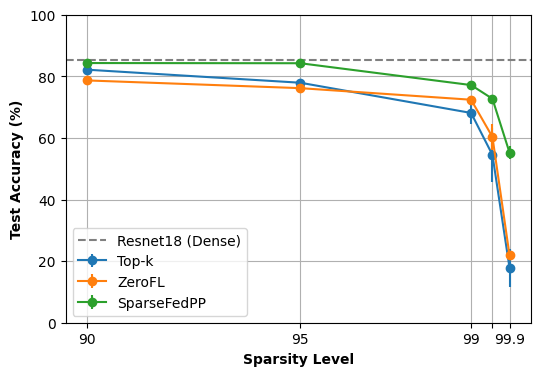

In [83]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## CIFAR10 - lda1.0

In [84]:
# lda1.0
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [80.56, 74.71, 66.27, 63.82, 31.79],
        "std": [1.90, 3.29, 5.08, 2.41, 19.10],
    },
    {
        "mean": [76.16, 75.53, 70.71, 56.02, 17.66],
        "std": [1.298, 2.27, 0.15, 3.95, 8.34],
    },
    {
        "mean": [82.13, 82.60, 77.71, 70.01, 51.39],
        "std": [1.53, 1.58, 1.69, 0.43, 3.19],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 83.70

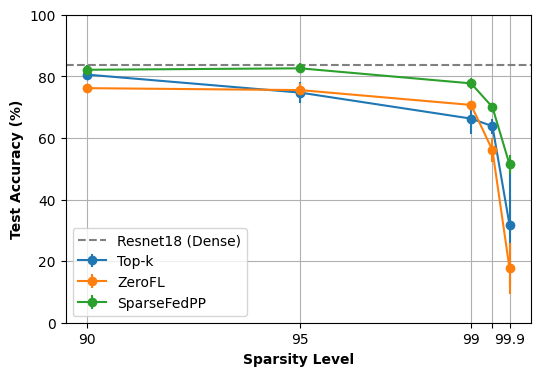

In [85]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## CIFAR10 - lda0.1

In [86]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [69.79, 60.00, 43.96, 19.02, 11.05],
        "std": [3.78, 4.66, 11.99, 10.77, 4.49],
    },
    {
        "mean": [67.40, 61.55, 51.71, 41.33, 18.76],
        "std": [4.11, 4.18, 3.54, 3.64, 4.28],
    },
    {
        "mean": [75.00, 75.95, 63.69, 56.79, 43.68],
        "std": [2.78, 3.39, 3.90, 3.97, 7.61],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 73.81

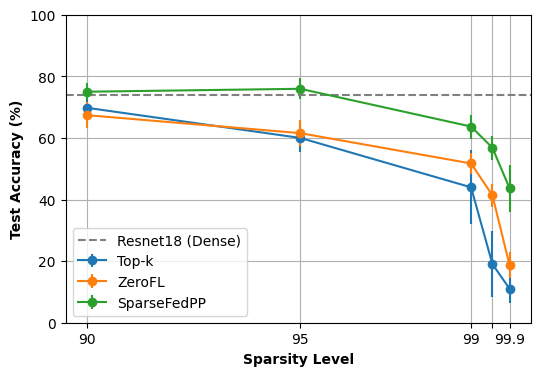

In [87]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## CIFAR100 - lda1000.0

In [88]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [46.47, 13.45, 1.54, 0.97, 0.97],
        "std": [1.74, 21.45, 1.22, 0.64, 0.64],
    },
    {
        "mean": [44.11, 33.67, 10.59, 4.04, 0.87],
        "std": [0.93, 3.34, 2.48, 3.43, 0.21],
    },
    {
        "mean": [54.44, 54.33, 47.62, 42.05, 13.85],
        "std": [1.33, 1.48, 1.67, 1.21, 1.01],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 53.79

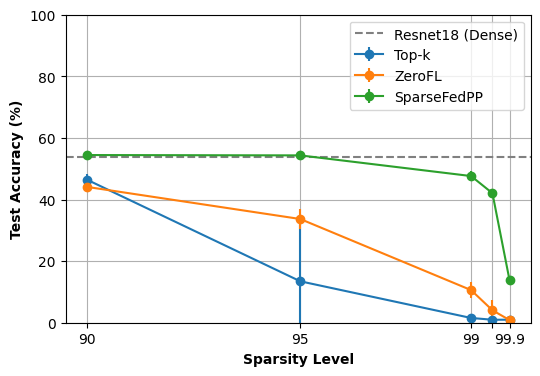

In [89]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## CIFAR100 - lda1.0

In [90]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [46.57, 28.07, 19.65, 9.51, 3.81],
        "std": [1.71, 23.27, 16.30, 14.81, 2.18],
    },
    {
        "mean": [40.70, 38.82, 18.97, 6.01, 1.96],
        "std": [4.72, 1.75, 2.08, 4.74, 0.66],
    },
    {
        "mean": [53.08, 52.81, 46.64, 42.21, 15.96],
        "std": [0.90, 1.72, 1.59, 1.03, 0.64],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 52.29

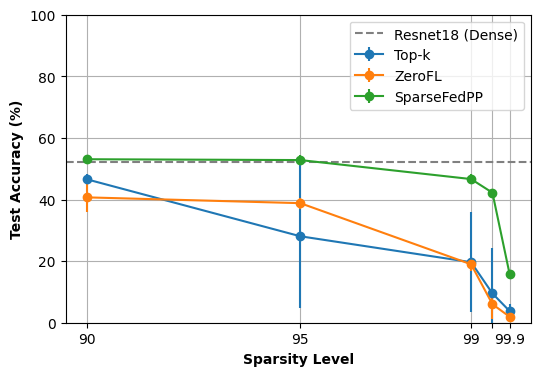

In [91]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## CIFAR100 - lda0.1

In [92]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [41.96, 11.48, 0.14, 0.14, 0.14],
        "std": [2.16, 17.51, 0.72, 0.72, 0.72],
    },
    {
        "mean": [31.92, 34.21, 13.07, 7.04, 1.66],
        "std": [7.65, 7.65, 2.26, 5.25, 0.97],
    },
    {
        "mean": [48.37, 48.27, 41.03, 35.72, 13.84],
        "std": [1.73, 2.70, 2.14, 2.01, 3.69],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 48.34

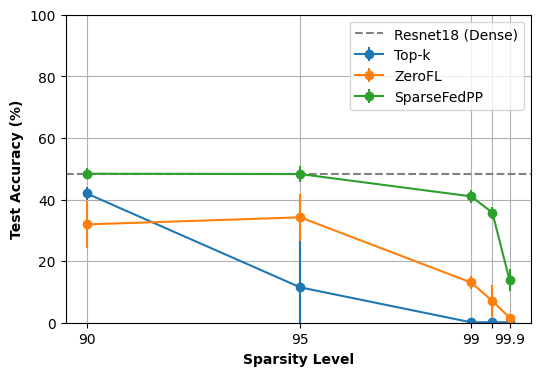

In [93]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## Speech Commands - lda1000.0


In [94]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [77.55, 68.59, 31.49, 36.69, 21.06],
        "std": [2.05, 2.75, 8.35, 1.45, 2.41],
    },
    {
        "mean": [75.52, 62.08, 42.16, 15.60, 6.48],
        "std": [3.66, 2.40, 5.24, 2.33, 0.80],
    },
    {
        "mean": [86.58, 80.88, 61.10, 51.80, 21.66],
        "std": [2.09, 2.36, 2.08, 1.97, 0.96],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 91.91

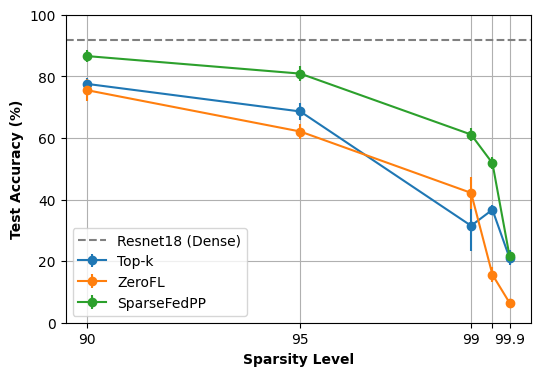

In [95]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## Speech Commands - lda1.0

In [96]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [75.06, 64.87, 41.61, 38.10, 15.20],
        "std": [1.32, 3.89, 0.95, 4.60, 7.42],
    },
    {
        "mean": [73.25, 63.53, 48.38, 23.69, 9.84],
        "std": [0.22, 0.65, 2.04, 10.23, 0.67],
    },
    {
        "mean": [85.31, 80.46, 60.92, 51.02, 27.90],
        "std": [1.49, 1.31, 0.63, 3.19, 4.95],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 91.22

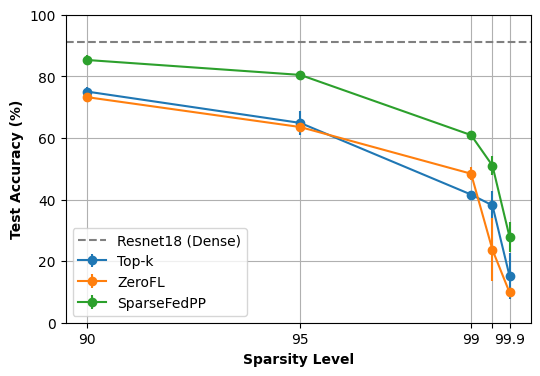

In [97]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()

## Speech Commands - lda0.1

In [98]:
# Define sparsity levels
sparsity_levels = [90, 95, 99, 99.5, 99.9]

# Model names to include
models = ["Top-k", "ZeroFL", "SparseFedPP"]

# Model performance data (accuracy)
performance_data = [
    {
        "mean": [57.10, 43.22, 28.17, 16.60, 10.54],
        "std": [0.89, 4.79, 5.15, 0.47, 2.31],
    },
    {
        "mean": [57.47, 45.96, 38.99, 19.48, 7.79],
        "std": [2.02, 2.75, 6.00, 6.25, 0.48],
    },
    {
        "mean": [72.86, 65.16, 47.68, 41.38, 15.87],
        "std": [4.36, 4.31, 2.69, 1.38, 2.29],
    },
]

# Resnet18 performance as a threshold (using first value as Resnet18 accuracy)
resnet18_threshold = 82.53

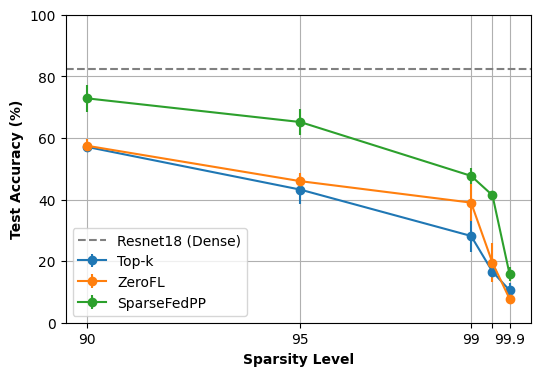

In [99]:
plt.figure(figsize=(6, 4))

# Plot each model's performance at different sparsity levels with error bars
for i, model in enumerate(models):
    mean_values = performance_data[i]["mean"]
    std_values = performance_data[i]["std"]
    plt.errorbar(sparsity_levels, mean_values, yerr=std_values, label=model, marker="o")

# Plot Resnet18 threshold line
plt.axhline(
    y=resnet18_threshold, color="gray", linestyle="--", label="Resnet18 (Dense)"
)

# Set plot properties
# plt.title('Model Performance at Different Sparsity Levels')
plt.xlabel("Sparsity Level", fontweight="bold")  # Make x-axis label bold
plt.ylabel("Test Accuracy (%)", fontweight="bold")  # Make y-axis label bold

# plt.xticks(sparsity_levels)
to_be_removed = 99.5
xticks_labels = [
    str(sparsity) if sparsity != to_be_removed else "" for sparsity in sparsity_levels
]
plt.xticks(sparsity_levels, xticks_labels)

plt.ylim(0, 100)  # Set the y-axis limits

plt.legend()
plt.grid(True)
plt.show()